# Rede Perceptron de Múltiplas Camadas
&nbsp;

**Questão 2** - Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as duas
funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso da letra
(b), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.

**a)** Função lógica XOR <br>
**b)** _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4
&nbsp;

### a) Função lógica XOR
 **Importação das bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

#### Declaração dos Arrays de entrada e saída

In [2]:
x = [[0,0], [0,1], [1,0], [1,1]]
y = [[0], [1], [1], [0]]

x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = x, x, y, y

In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [3]:
ann = tf.keras.models.Sequential()

#### Criação das camadas do Perceptron

In [4]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu', input_dim=2))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [5]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
ann.fit(x_train, y_train, batch_size = 50, epochs = 100, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 999us/step - loss: 5.2596 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 995us/step - loss: 2.7889 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 998us/step - loss: 2.5342 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 2.3720 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 2.2555 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 997us/step - loss: 2.1658 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 999us/step - loss: 2.0936 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 2.0337 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 997us/step - loss: 1.9828 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 1.9388 - accuracy: 0.5000
Epoch 11/100
1/1 

In [7]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

#### Matriz de confusão e acurácia

In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 0]
 [2 0]]


0.5

### b) _f(x) = sen(πx) / πx_ , 0 ≤ x ≤ 4

In [9]:
x = []
y = []

for line in open('data_x.txt', 'r').readlines():
    x.append([float(num) for num in line.split(',')])

for line in open('data_y.txt', 'r').readlines():
    y.append([float(num) for num in line.split(',')])
    
print(len(x), len(y))

400 400


In [10]:
# dados de treino
x = np.array(x[:int(len(x) * 0.8)])
y = np.array(y[:int(len(y) * 0.8)])

print(len(x), len(y))

# dados de validação
x_valid = np.array(x[int(len(x) * 0.8):])
y_valid = np.array(y[int(len(y) * 0.8):])

print(len(x_valid), len(y_valid))

320 320
64 64


X [TREINO]:  (320, 1)
Y [TREINO]:  (320, 1)

X [TESTE]:  (64, 1)
Y [TESTE]:  (64, 1)


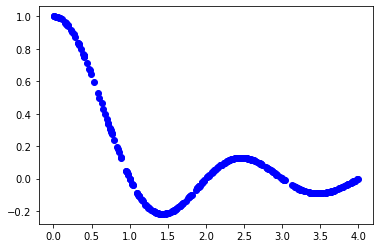

In [11]:
print("X [TREINO]: ", x.shape)
print("Y [TREINO]: ", y.shape)
print()
print("X [TESTE]: ", x_valid.shape)
print("Y [TESTE]: ", y_valid.shape)

plt.plot(x, y, 'bo')
plt.show()

In [12]:
ann = tf.keras.models.Sequential()

In [13]:
ann.add(tf.keras.layers.Dense(units=10, activation='tanh', input_dim=x.shape[1]))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))

ann.add(tf.keras.layers.Dense(units=y.shape[1], activation='tanh'))

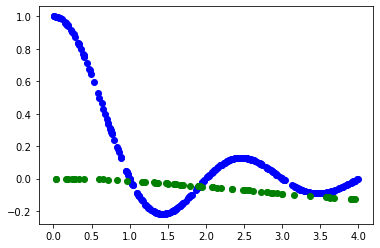

In [14]:
# treinamento
# errors_train, errors_valid = ann.fit(x, y, x_valid, y_valid, batch_size=1, epochs=500, verbose=50, accuracy=False)
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_valid, y_valid, batch_size = 32, epochs = 100, verbose=0)

# plot_error([errors_train, errors_valid], ["Treino", "Validação"])

# calculo do erro de predição
y_pred = ann.predict(x_valid)

plt.plot(x, y, 'bo')
plt.plot(x_valid, y_pred, 'go')
plt.show()